In [1]:
import pandas as pd
import os
import cv2
def get_images(folder):
    folder_opened = os.path.normpath(folder)
    sub_folders=os.listdir(folder_opened)
    lst=[]
    for sub in sub_folders:
        sub_opened=os.path.join(folder_opened,sub)
        for file in os.listdir(sub_opened):
           path_image=os.path.join(sub_opened,file)
           image_path = './' + path_image
           img=cv2.imread(image_path)
           rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
           lst.append({
                   "image":rgb_img,
                   "genre":sub.lower()
               })
    return pd.DataFrame(lst)
df=get_images('../IMDB_four_genre_posters')

In [2]:
df.head()

,image,genre
0,"[[[7, 5, 6], [7, 5, 6], [7, 5, 6], [7, 5, 6], ...",action
1,"[[[167, 150, 143], [167, 150, 143], [167, 150,...",action
2,"[[[112, 137, 144], [109, 134, 141], [106, 131,...",action
3,"[[[14, 5, 8], [15, 6, 7], [18, 8, 9], [19, 9, ...",action
4,"[[[38, 7, 64], [38, 7, 64], [38, 7, 64], [38, ...",action


In [3]:
len(df)

1325

<Axes: xlabel='genre'>

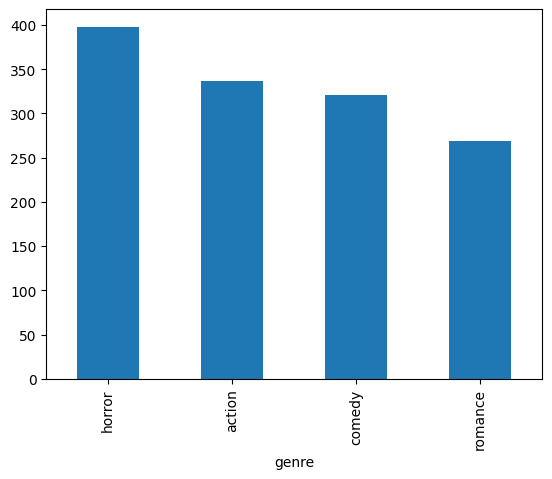

In [4]:
df['genre'].value_counts().plot(kind='bar')

(562, 380, 3)


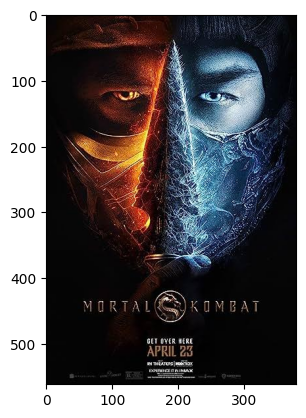

In [5]:
import matplotlib.pyplot as plt
print(df['image'][0].shape)
plt.imshow(df['image'][0])

In [6]:
import numpy as np
def preprocess_image(image:np.array, target_size:tuple=(224,224))->np.array:
    resized=cv2.resize(image,target_size)
    image=resized/255.0
    return resized

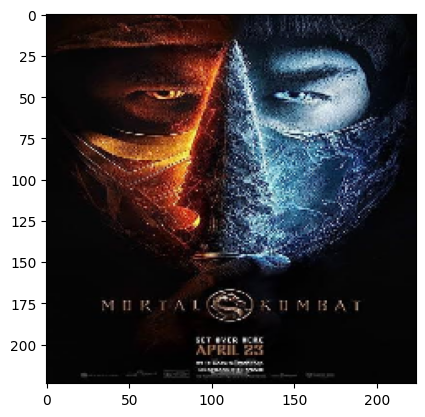

In [7]:
processed=df['image'].apply(preprocess_image)
plt.imshow(processed[0])

In [8]:
from src.utils.config_loader import load_config
import joblib

config = load_config("configs/base_config.yaml")["image_model"]
label_encoder_path = config["label_encoder_path"]
label_encoder=joblib.load(label_encoder_path)

In [9]:
genre=label_encoder.transform(df['genre'])

In [10]:
df.to_csv('../data/processed/images/data.csv')

# Modelling

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(processed,genre,test_size=0.2,random_state=42)


In [12]:
import numpy as np

X_train_flat = np.array([np.array(img).flatten() for img in X_train])
X_test_flat = np.array([np.array(img).flatten() for img in X_test])

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_flat, y_train)
y_pred = LR.predict(X_test_flat)


c:\Users\testr\Documents\Projects\Multi Modal Movie Genre Classification\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average='weighted'))
print('recall_score',recall_score(y_test,y_pred,average='weighted'))
print('f1_score',f1_score(y_test,y_pred,average='weighted'))

accuracy_score 0.3132075471698113
precision_score 0.31422817950747983
recall_score 0.3132075471698113
f1_score 0.31201054064610656
